In [53]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [54]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [55]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [56]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [57]:
# reflect an existing database into a new model
base = automap_base()

# reflect the tables
base.prepare(autoload_with=engine)

In [58]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [59]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station


In [60]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [61]:
inspector = inspect(engine)

mcolumns = inspector.get_columns('measurement')
for column in mcolumns:
    print(column['name'])

scolumns = inspector.get_columns('station')
for column in scolumns:
    print(column['name'])

id
station
date
prcp
tobs
id
station
name
latitude
longitude
elevation


In [62]:
# Find the most recent date in the data set.
# for row in session.query(measurement.date):
#     print(row)

session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

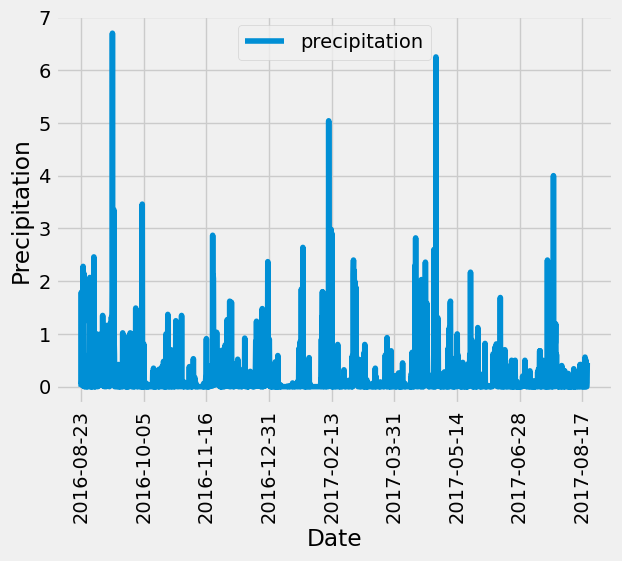

In [63]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
one_year_ago = session.query(measurement).filter(measurement.date == "2016-08-23")
# recent = session.query(measurement.date).order_by(measurement.date.desc()).first()
# Calculate the date one year from the last date in data set.
results = session.query(measurement).filter(measurement.date >= "2016-08-23")

dates = []
prcps = []
# Perform a query to retrieve the data and precipitation scores
for result in results:
    dates.append(result.date)
    prcps.append(result.prcp)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame({'date' : dates, 'precipitation':prcps})

# Sort the dataframe by date
sorted_date_df = prcp_df.sort_values(['date'], ascending=True).dropna(how='any')
grouped_dates = sorted_date_df.groupby(["date"])['precipitation'].sum()
# Use Pandas Plotting with Matplotlib to plot the data
sorted_date_df.plot(x='date', y='precipitation', rot=90)
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.show()

In [64]:
# Use Pandas to calculate the summary statistics for the precipitation data
sorted_date_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [65]:
scolumns = inspector.get_columns('station')
for column in scolumns:
    print(column['name'])


id
station
name
latitude
longitude
elevation


In [66]:
# Design a query to calculate the total number of stations in the dataset
session.query(station.station).count()
# for row in session.query(station):
#     print(row.id,row.station,row.name,row.latitude,row.longitude,row.elevation)

9

In [67]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
stations_list = session.query(measurement.station, func.count(measurement.station))\
    .group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
stations_list


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [68]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measurement.tobs),func.max(measurement.tobs), func.avg(measurement.tobs))\
    .filter(measurement.station == 'USC00519281').all()


[(54.0, 85.0, 71.66378066378067)]

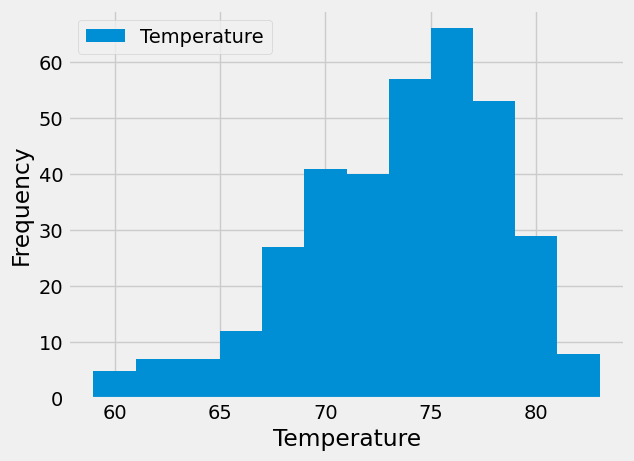

In [104]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temps = session.query(measurement).filter(measurement.station == 'USC00519281')\
    .filter(measurement.date >= "2016-08-23")

temp_list = []

for row in temps:
    temp_list.append(row.tobs)

temp_df = pd.DataFrame({'temperature' : temp_list})
temp_df
plt.hist(temp_df['temperature'], bins = 12, label='Temperature')
plt.ylabel('Frequency')
plt.xlabel('Temperature')
plt.legend()

# Close Session

In [16]:
# Close Session
session.close()